In [37]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from PIL import Image

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 

def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    Roi_X1 = []
    Roi_Y1 = []
    Roi_X2 = []
    Roi_Y2 = []

    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            Roi_X1.append(int(row[3])) # The 4th column, starting pixel in horizontal manner
            Roi_Y1.append(int(row[4])) # The 5th column, starting pixel in vertical manner
            Roi_X2.append(int(row[5])) # The 6th column, ending pixel in horizontal manner
            Roi_Y2.append(int(row[6])) # The 7th column, ending pixel in horizontal manner
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2

images,labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2 = readTrafficSigns('C:/Users/Pradeep/PycharmProjects/IcvTask1/GTSRB/Final_Training/Images/')  

In [54]:
#For Debugging purpose
print(len(images))

26610


In [39]:
#image filteration.
#background noise removal.
#filtering the images, so that the backgroung noise will be removed.
filtered_images = []
#im = 0
#print(images[im][Roi_X1[im]:Roi_X2[im],Roi_Y1[im]:Roi_Y2[im]])
for im in range(len(images)):
  filtered_images.append(images[im][Roi_X1[im]:Roi_X2[im]+1,Roi_Y1[im]:Roi_Y2[im]+1])
  

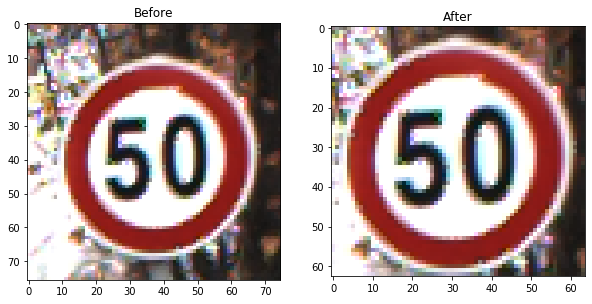

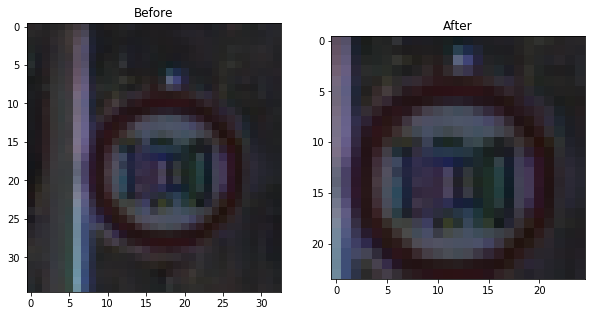

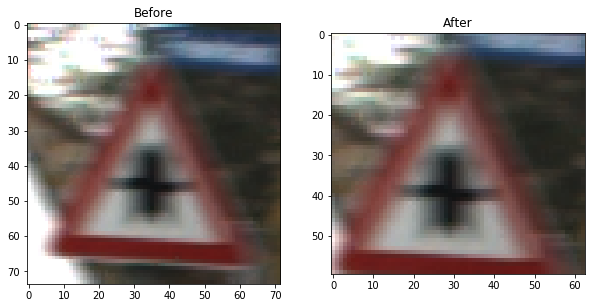

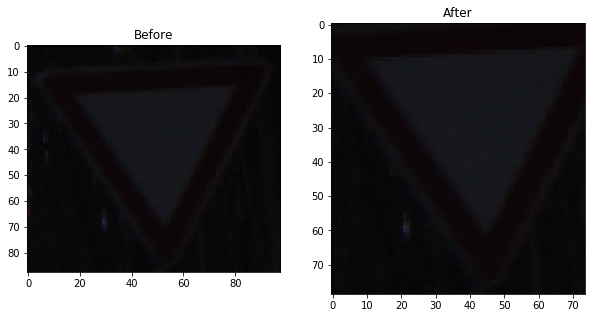

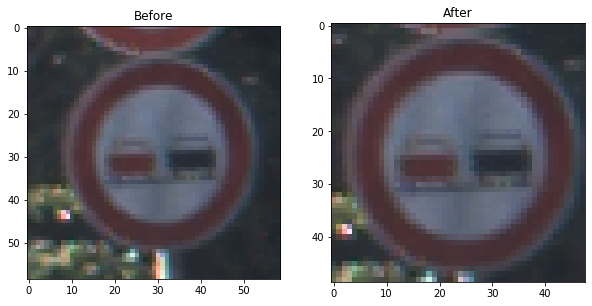

In [57]:
import numpy as np
# Final filtered results, random samples
index_val = list(set(np.random.randint(0, len(filtered_images), 5)))

for row in range(len(index_val)):
    fig = plt.figure(figsize = (10, 30))
    plt_list = {'Before':images[index_val[row]], 'After':filtered_images[index_val[row]]}
    
    for count, cols in enumerate(plt_list.keys()):
        fig.add_subplot(len(index_val), len(plt_list), count + 1)
        plt.title(cols)
        plt.imshow(plt_list[cols])
        
    plt_list = {}
    plt.show()

In [ ]:
from skimage.transform import resize
image_resized = []
for im in filtered_images:
  image_resized.append(resize(im, (64,64),
                       anti_aliasing=False))


In [ ]:
from skimage.color import rgb2yuv
yuv_images = []
for im in image_resized:
  yuv_images.append(rgb2yuv(im))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


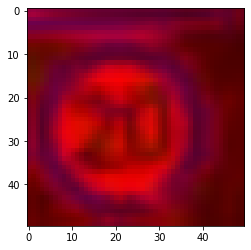

In [43]:
plt.imshow(yuv_images[0])

In [45]:
yuv_images_array = np.array(yuv_images, dtype='float')

labels_array = np.array(labels, dtype='int')  

In [46]:
grayed_unrolled_images = []
from skimage import color
from sklearn import svm
grayed_images = color.rgb2gray(yuv_images_array)
for i in grayed_images:
    grayed_unrolled_images.append(np.ravel(i))
    
grayed_un_images = np.array(grayed_unrolled_images)
clf = svm.SVC(gamma='scale')
clf.fit(grayed_un_images, labels_array)



hello


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
tmp = grayed_un_images[25000].reshape(1,2500)
clf.predict(tmp)

array([17])

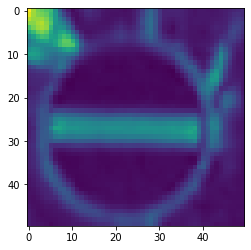

In [52]:
plt.imshow(grayed_un_images[25000].reshape(50,50))